In [6]:
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

In [7]:

# get connected to the database
connection = pg.connect("dbname=Employee_db user=postgres password=!holySpirit78")


****Created a fact table to be  the  center  of all the foreign  keys to  capture a single  version of truth of  data.***

In [8]:
 
data_salaries_ave_df= pd.read_sql("SELECT * FROM fact_employee", connection)
data_salaries_ave_df.head()


,emp_no,dept_no,title_id,salary_ID,title,salary,title_from_date,title_to_date,salary_from_date,salary_to_date
0,10001,d005,1,300024,Senior Engineer,60117.0,1986-06-26,9999-01-01,1986-06-26,1987-06-26
1,10002,d007,2,300025,Staff,65828.0,1996-08-03,9999-01-01,1996-08-03,1997-08-03
2,10003,d004,1,300026,Senior Engineer,40006.0,1995-12-03,9999-01-01,1995-12-03,1996-12-02
3,10004,d004,3,300027,Engineer,40054.0,1986-12-01,1995-12-01,1986-12-01,1987-12-01
4,10004,d004,1,300027,Senior Engineer,40054.0,1995-12-01,9999-01-01,1986-12-01,1987-12-01


In [10]:
data_salaries_ave_df.groupby('title')['salary'].mean().round(2)

title
Assistant Engineer    48493.20
Engineer              48539.78
Manager               51531.04
Senior Engineer       48506.75
Senior Staff          58503.29
Staff                 58465.27
Technique Leader      48580.51
Name: salary, dtype: float64

***The chart shows there are uneven distribution of salaries based on the  title.  The result will be  recommended for  more research to drill down  the truth. Somehow  they started  in different time period. Perhaps if we could   group this by year,  title and salaries, the  output would be  different. The  datasets  need more  cleaning  and  validations. ***

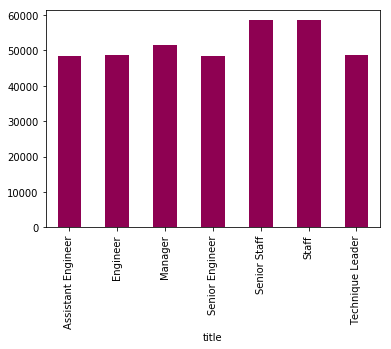

In [44]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Fake dataset

#bars = ('Assist Enginner', 'Enginner', 'Manager', 'Sr Engineer', 'Sr. Staff','Staff','Tech Leader')

data_salaries_ave_df.groupby('title')['salary'].mean().round(2).plot(kind='bar',stacked=True,colormap='PiYG')

plt.show()
